In [29]:
import pandas as pd
import matplotlib
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [3]:
# importando o dataset para treino, contendo os textos e suas respectivas categorias
dataset = pd.read_csv('bbc-text.csv', encoding='utf-8')
# exibindo a quantidade de textos e categorias do dataset
dataset.count()

category    2225
text        2225
dtype: int64

In [4]:
# exibindo as primeiras 5 linhas do dataset
dataset.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


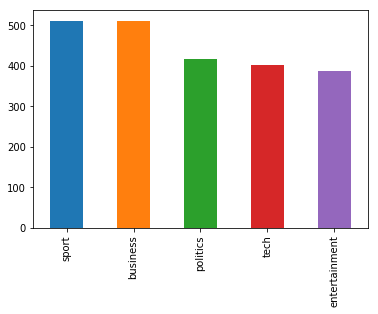

In [6]:
# exibição do gráfico que mostra a quantidade de textos por categoria
%matplotlib inline
dataset['category'].value_counts().plot(kind='bar')

In [10]:
x_train = dataset['text'].values
y_train = dataset['category'].values

# aplicação de algoritmo de tokenização, o CountVectorizer
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)

# salva o vocabulario gerado pelo algoritmo de tokenização
pickle.dump(vectorizer.vocabulary_, open('data/vocabulary.pkl', 'wb'))

In [11]:
# instancia o algoritmo de Classificação Naive Bayes, e o treina utilizando os dados vetorizados
modelonb = MultinomialNB().fit(x_train_counts, y_train)

# salva o modelo treinado
pickle.dump(modelonb, open('data/modelonb.pkl', 'wb'))

In [14]:
# usando a técnica de validação cruzada, fazemos a predição do nosso modelo
predicted = cross_val_predict(modelonb, x_train_counts, y_train, cv=10)
# exibe a precisão da predição
metrics.accuracy_score(y_train,predicted)

0.9752808988764045

In [16]:
# exibição da matriz de confusão do nosso modelo
pd.crosstab(y_train, predicted, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,business,entertainment,politics,sport,tech,All
Real,,,,,,
business,487,1,11,0,11,510
entertainment,2,371,6,0,7,386
politics,6,1,408,0,2,417
sport,1,0,1,509,0,511
tech,1,2,3,0,395,401
All,497,375,429,509,415,2225


In [17]:
# exibição da métricas de precisão do modelo (precisão, recall e f1-score)
categorias = dataset['category'].unique()
print(metrics.classification_report(y_train,predicted,categorias), '')

               precision    recall  f1-score   support

         tech       0.95      0.99      0.97       401
     business       0.98      0.95      0.97       510
        sport       1.00      1.00      1.00       511
entertainment       0.99      0.96      0.98       386
     politics       0.95      0.98      0.96       417

    micro avg       0.98      0.98      0.98      2225
    macro avg       0.97      0.98      0.97      2225
 weighted avg       0.98      0.98      0.98      2225
 


In [19]:
# importação do dataset de testes
dataset_test = pd.read_csv('test.csv')
# quantidade de textos e categorias do dataset
dataset_test.count()

category    25
text        25
dtype: int64

In [21]:
# exibição das 10 primeiras linhas do dataset de testes
dataset_test.head(10)

,category,text
0,business,The UK economy grew by 0.6% in the three month...
1,business,Bombardier workers face uncertainty after the ...
2,business,The Bank of England is testing the UK's abilit...
3,business,Thanks to President Trump there may be choppy ...
4,business,The BBC's weekly The Boss series profiles diff...
5,tech,A Chinese headmaster has been fired after a se...
6,tech,Google employees will now be able to more free...
7,tech,A US man accused of knocking game servers offl...
8,tech,YouTube has restored several videos showing a ...
9,tech,Xiaomi - the world's fourth bestselling handse...


In [26]:
x_test = dataset_test['text'].values
y_test = dataset_test['category'].values

# tokenização dos textos de testes
x_test_counts = vectorizer.transform(x_test)

In [27]:
predicted_test = modelonb.predict(x_test_counts)
# exibe a precisão da predição dos dados de testes
metrics.accuracy_score(y_test,predicted_test)

0.92

In [28]:
# exibição da matriz de confusão da predição dos dados de teste
pd.crosstab(y_test, predicted_test, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,business,entertainment,politics,sport,tech,All
Real,,,,,,
business,3,0,1,0,1,5
entertainment,0,5,0,0,0,5
politics,0,0,5,0,0,5
sport,0,0,0,5,0,5
tech,0,0,0,0,5,5
All,3,5,6,5,6,25


In [30]:
# utilização do algoritmo de tf-idf, para vermos se o classificador melhora
tfidf = TfidfTransformer(smooth_idf=False)
x_train_tfidf = tfidf.fit_transform(x_train_counts)

# treinamento do classificador utilizando a matriz de pesos
modelonb.fit(x_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
# usando a técnica de validação cruzada, fazemos a predição do nosso modelo
predicted = cross_val_predict(modelonb, x_train_tfidf, y_train, cv=10)
# exibe a precisão da predição
metrics.accuracy_score(y_train,predicted)

0.9546067415730337

In [32]:
# exibição da matriz de confusão do nosso modelo
pd.crosstab(y_train, predicted, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,business,entertainment,politics,sport,tech,All
Real,,,,,,
business,490,0,11,1,8,510
entertainment,8,332,20,16,10,386
politics,5,0,406,4,2,417
sport,1,0,0,510,0,511
tech,5,2,3,5,386,401
All,509,334,440,536,406,2225


In [33]:
# aplicação do tf-idf nos dados de teste
x_test_tfidf = tfidf.transform(x_test_counts)

predicted_test = modelonb.predict(x_test_tfidf)
# exibe a precisão da predição dos dados de testes
metrics.accuracy_score(y_test,predicted_test)

0.8

In [34]:
# exibição da matriz de confusão da predição dos dados de teste
pd.crosstab(y_test, predicted_test, rownames=['Real'], colnames=['Predito'], margins=True)

Predito,business,entertainment,politics,sport,tech,All
Real,,,,,,
business,5,0,0,0,0,5
entertainment,0,2,1,2,0,5
politics,0,0,5,0,0,5
sport,0,0,0,5,0,5
tech,2,0,0,0,3,5
All,7,2,6,7,3,25
